In [1]:
# supervised greedy layer-wise pretraining for blobs classification problem
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
# prepare the dataset
def prepare_data():
    # generate 2d classification dataset
    X, Y = make_blobs(n_samples=1000, centers=3, n_features=2,
                     cluster_std=2, random_state=2)
    # one hot encode output varible
    Y = to_categorical(Y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainY, testY = Y[:n_train], Y[n_train:]
    return trainX, testX, trainY, testY

In [3]:
# define and fit the base model
def get_base_model(trainX, trainY):
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu',
                   kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt,
                 metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainY, epochs=100, verbose=0)
    return model

In [4]:
# evaluate a fit model
def evaluate_model(model, trainX, testX, trainY, testY):
    _, train_acc = model.evaluate(trainX, trainY, verbose=0)
    _, test_acc = model.evaluate(testX, testY, verbose=0)
    return train_acc, test_acc

In [5]:
# add one new layer and re-train only the new layer
def add_layer(model, trainX, trainY):
    # remember the current output layer
    output_layer = model.layers[-1]
    # remove the output layer
    model.pop()
    # mark all remaining layers as non-trainable
    for layer in model.layers:
        layer.trainable = False
    # add a new hidden layer
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    # re-add the output layer
    model.add(output_layer)
    # fit model
    model.fit(trainX, trainY, epochs=100, verbose=0)

In [6]:
# prepare data
trainX, testX, trainY, testY = prepare_data()

In [7]:
trainX.shape

(500, 2)

In [8]:
testY.shape

(500, 3)

In [9]:
# get the base model
model = get_base_model(trainX, trainY)

W1221 05:36:07.287334 12384 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1221 05:36:07.327488 12384 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1221 05:36:07.335461 12384 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1221 05:36:07.423060 12384 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1221 05:36:07.440030 12384 deprecation_wrapper.py:119] From C:\Users\Lenovo

In [10]:
# evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainY, testY)

In [11]:
len(model.layers)

2

In [12]:
train_acc

0.8319999995231628

In [13]:
test_acc

0.8339999990463257

In [14]:
scores[len(model.layers)] = (train_acc, test_acc)

In [17]:
# add layers and evaluate the update model
n_layers = 10
for i in range(n_layers):
    # add layer
    add_layer(model, trainX, trainY)
    # evaluate model
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainY, testY)
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    # store scores for plotting
    scores[len(model.layers)] = (train_acc, test_acc)

> layers=4, train=0.838, test=0.830
> layers=5, train=0.842, test=0.828
> layers=6, train=0.832, test=0.830
> layers=7, train=0.840, test=0.830
> layers=8, train=0.842, test=0.830
> layers=9, train=0.838, test=0.834
> layers=10, train=0.840, test=0.830
> layers=11, train=0.830, test=0.834
> layers=12, train=0.840, test=0.836
> layers=13, train=0.844, test=0.826


In [19]:
scores.keys()

dict_keys([2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [21]:
[scores[k][0] for k in scores.keys()]

[0.8319999995231628,
 0.8380000009536743,
 0.8420000009536743,
 0.8320000009536743,
 0.8400000009536743,
 0.8420000009536743,
 0.8380000009536743,
 0.8400000009536743,
 0.8299999990463257,
 0.8400000009536743,
 0.8440000009536743]

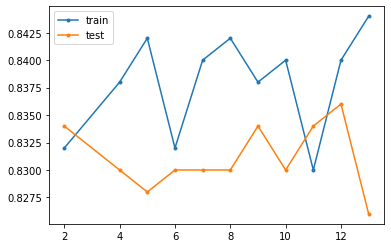

In [24]:
# plot number of added layers vs accuracy
pyplot.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
pyplot.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
pyplot.legend()
pyplot.show()